# Advanced Lane Finding Project

The goals / steps of this project are the following:

- **Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.**
- Apply a distortion correction to raw images.
- Use color transforms, gradients, etc., to create a thresholded binary image.
- Apply a perspective transform to rectify binary image ("birds-eye view").
- Detect lane pixels and fit to find the lane boundary.
- Determine the curvature of the lane and vehicle position with respect to center.
- Warp the detected lane boundaries back onto the original image.
- Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

# Camera calibration

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load calibration images.
calibrationImages = list(map(lambda imageFileName: (imageFileName, cv2.imread(imageFileName)), glob.glob('./camera_cal/c*.jpg')))


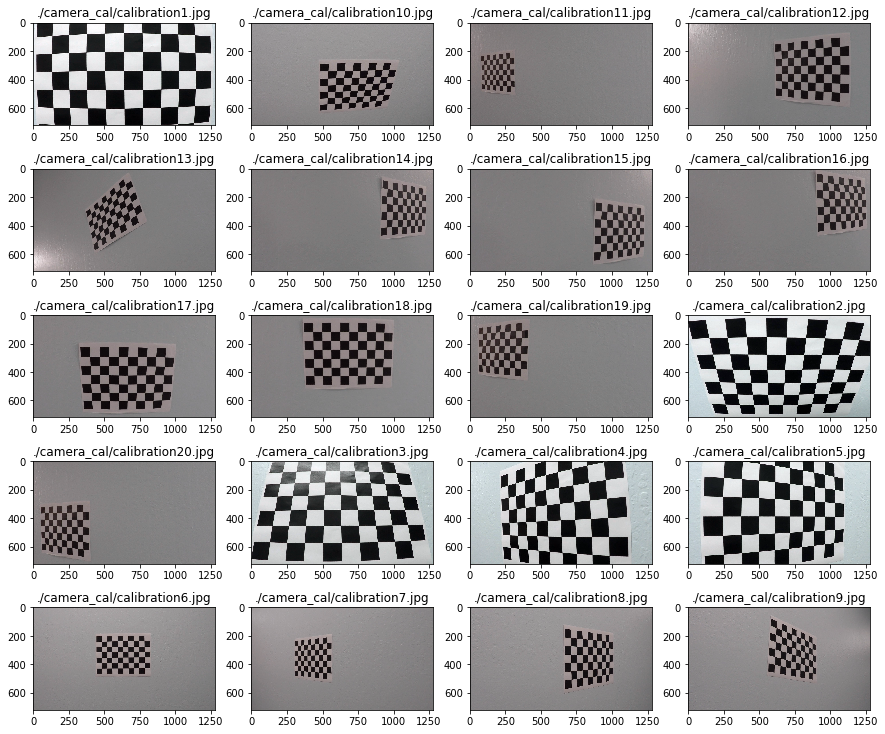

In [3]:
def showImages(images, cols = 4, rows = 5, figsize=(15,10)):
    """
    Display `images` on a [`cols`, `rows`] subplot grid.
    """
    imgLength = len(images)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    indexes = range(cols * rows)
    for ax, index in zip(axes.flat, indexes):
        if index < imgLength:
            imagePathName, image = images[index]
            ax.imshow(image)
            ax.set_title(imagePathName)
        
showImages(calibrationImages, 4, 5, (15, 13))

In [4]:
objpoints = []
imgpoints = []
outimages = []
originalImages = []

objp = np.zeros((6*9,3), np.float32) 
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) # x and y cordinates.

for imageAndFile in calibrationImages:
    fileName, image = imageAndFile
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

        img_points = cv2.drawChessboardCorners(image.copy(), (9,6), corners, ret)
        outimages.append(img_points)
        originalImages.append(image)

print('Image with corner found: {}'.format(len(outimages)))

Image with corner found: 17


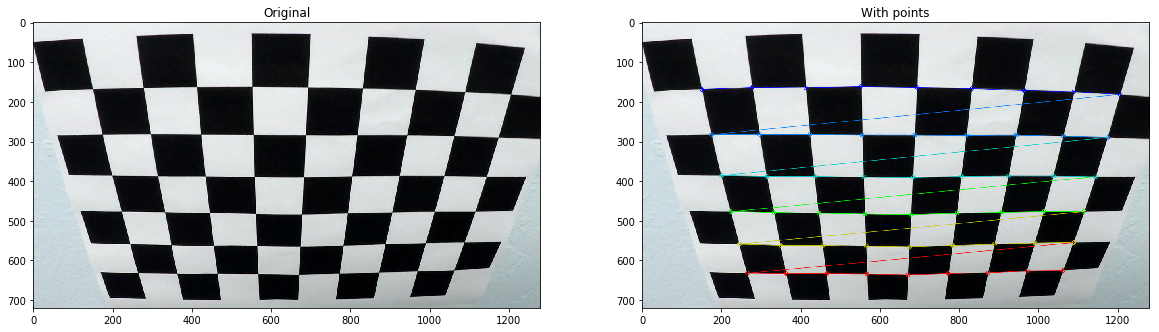

In [5]:
index = 10
original = originalImages[index]
chessPoints = outimages[index]
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
axes[0].imshow(original)
axes[0].set_title('Original')
axes[1].imshow(chessPoints)
axes[1].set_title('With points')

In [6]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, original.shape[0:2], None, None)

In [7]:
undist = cv2.undistort(original, mtx, dist, None, mtx)

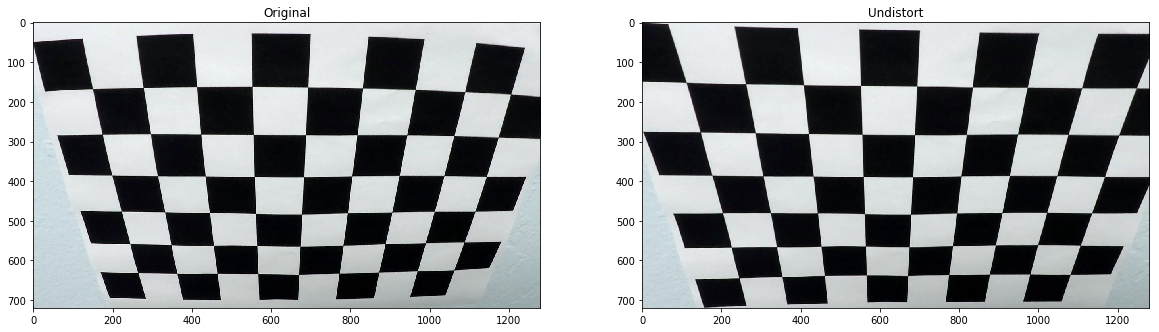

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
axes[0].imshow(original)
axes[0].set_title('Original')
axes[1].imshow(undist)
axes[1].set_title('Undistort')

In [9]:
import pickle
pickle.dump( { 'mtx': mtx, 'dist': dist }, open('./pickled_data/camera_calibration.p', 'wb'))